# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第6回　2024年1月23日(火)<br>
データマイニング手法3-1：回帰分析（講義と分析手法の基礎）<br>
Method 3-1: Regression (Lecture and basic skills)<br>
</font>

<span style="color: red;font-weight:bold; font-size:15pt;" >レポート: 締め切り 2024年1月26日(金)　23:59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [61]:
# print 関数を使って下さい / Use print function.
print("一瀬遥希")
print("1TE22028G")

一瀬遥希
1TE22028G


## (1) 回帰分析とは
(1) 回帰分析の回帰定数と回帰係数について説明してください。<br>
(2) 単回帰分析と重回帰分析の違いを説明してください。<br>
<br>
(1) Please explain the regression constants and regression coefficients in regression analysis.<br>
(2) Please explain the difference between a simple regression analysis and a multiple regression analysis.<br>

##
(1)回帰定数と回帰係数<br>
回帰定数は、目的変数と説明変数の間の関係を関数でモデル化したときの切片にあたり、回帰直線のY軸上での交点を示す。それに対し、回帰係数はモデル化した関数の中での説明変数の係数に当たるもので、その値が大きければ目的変数への影響も大きいと言える。また、複数の説明変数があればそのそれぞれに対する回帰係数が存在する。

(2)単回帰分析と重回帰分析<br>
単回帰分析は1つの説明変数と1つの目的変数の関係を分析し、モデル化するのに対して、重回帰分析は2つ以上の説明変数を含み、それらが目的変数に与える影響を同時に考慮し分析を行うものである。

## (2) 必要なライブラリをインポートしてください。 / Import libraries.

In [62]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn
from sklearn import linear_model

# 小数第3位まで表示 / display up to the 3rd decimal place
%precision 3

'%.3f'

## (3) CSVファイルを読み込む / Load a CSV file
w6_beer1822.csv　を読み込んでください。<br>
Please load a data file, w6_beer1822.csv.<br>

* Year: 年 / The year of the data
* Month: 月 / The month of the data
* Temperature: 月別平均気温 / Average temperature of the month
* Beer Sales: 月別ビール販売数量（単位:万箱） / The amount of beer (Asahi Super Dry) which was sold in the month (Unit: 10,000 boxes).

ビール1箱 = 633ml * 20 本<br>
Beer 1 box = 633ml * 20 bottles<br>

<!--
1 箱 = 8,000円<br>
1 box = 8,000 yen<br>
-->

[データ元：アサヒビールホールディングス](https://www.asahigroup-holdings.com/ir/financial_data/monthly_data.html)<br>
[データ元：気象庁月別平均気温](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662)<br>

[Week 2: read csv](Ex_Week2.ipynb#readcsv_index)<br>
[pandasでcsv/tsvファイル読み込み（read_csv, read_table）](https://note.nkmk.me/python-pandas-read-csv-tsv/)<br>
[pandas.read_csv @ Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [63]:
df=pd.read_csv('data/w6_beer1822.csv')

## (4) 最初の5行を表示してください。
Display the first five rows.


In [64]:
df.head(20)

,Year,Month,Temperature,Beer Sales
0,2018,1,4.7,426
1,2018,2,5.4,640
2,2018,3,11.5,618
3,2018,4,17.0,746
4,2018,5,19.8,694
5,2018,6,22.4,882
6,2018,7,28.3,963
7,2018,8,28.1,898
8,2018,9,22.9,668
9,2018,10,19.1,661


## (5) グラフにプロット / Plot a figure : Month vs. Beer Sales
年ごとにgroupbyしたあと、横軸に月、縦軸にビールの販売量をとって、散布図をプロットしてください。<br>
年ごとに異なる色のマークを使ってください。<br>
できる人はfor文を使ってスマートに書いてみましょう♪<br>
<br>
After using groupby by year, plot a scatter plot with the month on the horizontal axis and the beer sales on the vertical axis.<br>
Use different color marks for each year.<br>
If you can do it, try to write your code using a for statement.<br>
<br>
[Week 5: Visualization of clusters](Ex_Week5.ipynb#cluster_visualization)<br>

In [65]:
grouped = df.groupby('Year')

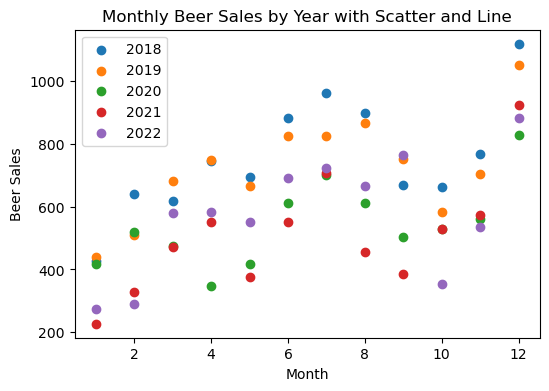

In [66]:
plt.figure(figsize=(6, 4))

for name, group in grouped:
    plt.scatter(group["Month"], group["Beer Sales"], label=f"{name}")

plt.xlabel("Month")
plt.ylabel("Beer Sales")
plt.title("Monthly Beer Sales by Year with Scatter and Line")
plt.legend()
plt.show()

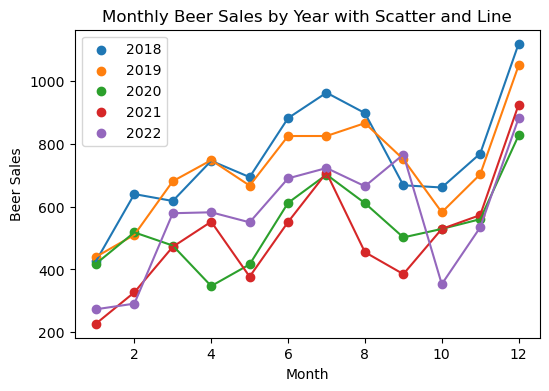

In [67]:
plt.figure(figsize=(6, 4))

for name, group in grouped:
    plt.scatter(group["Month"], group["Beer Sales"], label=f"{name}")
    plt.plot(group["Month"], group["Beer Sales"], linestyle ='-')

plt.xlabel("Month")
plt.ylabel("Beer Sales")
plt.title("Monthly Beer Sales by Year with Scatter and Line")
plt.legend()
plt.show()

## (6) グラフにプロット / Plot a figure : Month vs. Temperature
年ごとにgroupbyしたあと、横軸に月、縦軸に気温をとって、散布図をプロットしてください。<br>
年ごとに異なる色のマークを使ってください。<br>
<br>
After using groupby by year, plot a scatter plot with the month on the horizontal axis and the temperature on the vertical axis.<br>
Use different color marks for each year.<br>


[Week 5: Visualization of clusters](Ex_Week5.ipynb#cluster_visualization)<br>

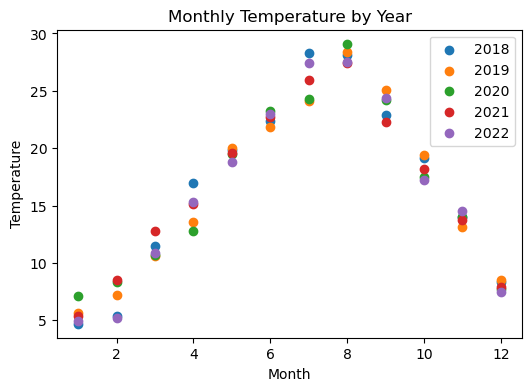

In [68]:
plt.figure(figsize=(6, 4))

for name, group in grouped:
    plt.scatter(group["Month"], group["Temperature"], label=name)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Monthly Temperature by Year")
plt.legend()
plt.show()

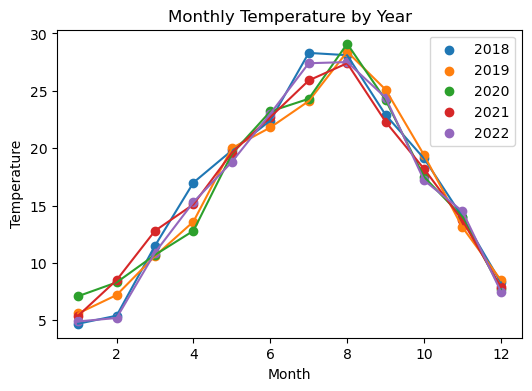

In [69]:
plt.figure(figsize=(6, 4))

for name, group in grouped:
    plt.scatter(group["Month"], group["Temperature"], label=name)
    plt.plot(group["Month"], group["Temperature"], linestyle ='-')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Monthly Temperature by Year")
plt.legend()
plt.show()

## (7) グラフにプロット / Plot a figure : Temperature vs. Beer Sales
横軸に気温、縦軸にビール売り上げをとって、散布図をプロットしてください。

Plot a scattering plot with temperature on the horizontal axis and beer sales on the vertical axis.

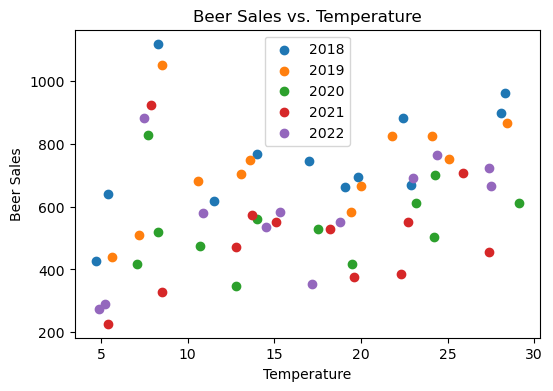

In [70]:
plt.figure(figsize=(6, 4))

for name, group in grouped:
    plt.scatter(group["Temperature"], group["Beer Sales"], label=name)

plt.xlabel("Temperature")
plt.ylabel("Beer Sales")
plt.title("Beer Sales vs. Temperature")
plt.legend()
plt.show()

## (8) 12月のデータ行を削除して、新しいDataFrameに格納する。 / Delete the December data rows and store them in a new DataFrame.

12月は忘年会シーズンなので、気温が低くても売り上げが高く、線形回帰の線に乗りません。<br>
12月のデータを削除して、線形回帰分析を行います。

In December, it is the season for year-end parties, so sales are high even though the temperature is low.<br>
Therefore, in order to perform linear regression analysis, we need to analyze data separately, December and the rest.<br>
Please remove the December data for a single regression analysis.<br>

1月から11月までのデータを抽出して、新しいDataFrameに格納するのでもよい。<br>
You can extract data from January to November of each year.

In [71]:
# Creating a DataFrame without December data
df2= df[df['Month'] != 12]
df2.head(24)


,Year,Month,Temperature,Beer Sales
0,2018,1,4.7,426
1,2018,2,5.4,640
2,2018,3,11.5,618
3,2018,4,17.0,746
4,2018,5,19.8,694
5,2018,6,22.4,882
6,2018,7,28.3,963
7,2018,8,28.1,898
8,2018,9,22.9,668
9,2018,10,19.1,661


## (9) 目的変数と説明変数を散布図でプロットしてみる
Plot the data of the objective variable and the explanatory varialbe with a scattering plot.

+ 説明変数 (Temperature) / Explanatory variable: temperature (気温)
+ 目的変数 (Sales) / Object variable: sales of beer (ビールの販売数量)

12月の外れているデータがなくなっていることを確認できましたか??<br>
Did you confirm that the outlier data in December were removed??

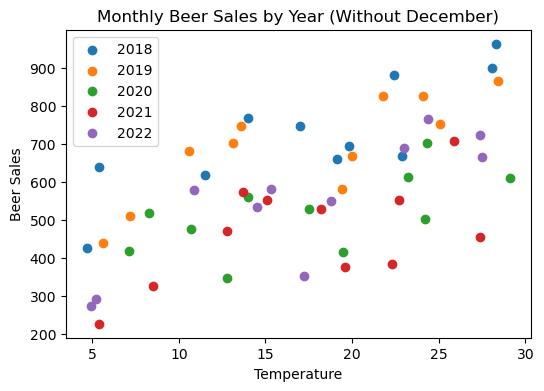

In [72]:
grouped_df2 = df2.groupby('Year')

plt.figure(figsize=(6, 4))

for name, group in grouped_df2:
    plt.scatter(group["Temperature"], group["Beer Sales"], label=name)

plt.xlabel("Temperature")
plt.ylabel("Beer Sales")
plt.title("Monthly Beer Sales by Year (Without December)")
plt.legend()
plt.show()

## (10) numpy配列の形で変数を準備する。/ Prepare variables in the form of numpy arrays.
+ 説明変数 (Temperature) / Explanatory variable: temperature (気温)
+ 目的変数 (Sales) / Object variable: sales of icecream (アイスの売り上げ)

をnumpy配列に変換してください。<br>
もともと読み込んだDataFrameではなくて、NaNを削除したDataFrameを使うように気を付けてください。<br>
<br>
Prepare variables in the form of numpy arrays.<br>
Be careful to use the DataFrame with the NaN removed, not the originally loaded DataFrame. <br>

[pandas.DataFrame, SeriesとNumPy配列ndarrayを相互に変換@note.nkmk.me](https://note.nkmk.me/python-pandas-numpy-conversion/)

In [73]:
# 説明変数 (Temperature) / Explanatory variable: Temperature
x = df2.Temperature.values
print(type(x))

# 目的変数 (Sales) / Object variable: Sales of icecream
y = df2.loc[:, 'Beer Sales'].values
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## (11) scikit-learnのmodel.fitではデータの次元を明示する。
## Data dimension has to be defined explicitly for the analysis with model.fit of scikit-learn.

In [74]:
# shapeを確認 / check the size of the array
print(np.shape(x))
print(np.shape(y))

# reshapeを使って各データを1Dデータと明示する / Define the dimension of the array explicitly with reshape.
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# shapeを確認（reshapeの効果を確認する）/ check the size of the array again, then verify how reshape works.
print(np.shape(x))
print(np.shape(y))


(55,)
(55,)
(55, 1)
(55, 1)


## (12) 線形回帰をする / Apply linear regression.

In [75]:
# 線形回帰のインスタンスを生成 / create an instance of simple regression
model = linear_model.LinearRegression()

In [76]:
# 学習実行 / apply fit
model.fit(x, y)


LinearRegression()

In [77]:
# xに対する予測値を計算 / obtain the predicted value.
reg_y = model.predict(x)             

## (13) パラメータ算出 / Calculate important parameters

In [78]:
# 回帰係数 / Regression coefficient
reg_a = model.coef_

# 回帰定数 / Regression constant
reg_b = model.intercept_

# .predict(x)で得られたxに対する予測値は、回帰係数と回帰定数を使って以下のように計算したものと同じ。
# reg_y = reg_a*x+reg_b

# 決定係数 / Coefficient of determination
r2 =  model.score(x, y)

print(reg_a)
print(reg_b)
print(r2)


[[13.742]]
[351.138]
0.3554050473047803


## (14) 描画 / Visualization

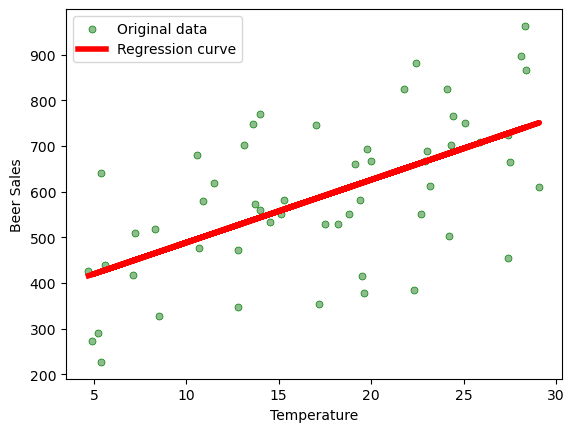

In [79]:
# fig, axオブジェクトの作成
fig, ax1 = plt.subplots()

# 軸のラベルを設定する。/ Set label of the axes.
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Beer Sales')

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。/ Plot data. Set label, thickness and the position of the legend.
ax1.scatter(x, y, label='Original data', s=100, c='darkseagreen', marker='.', alpha=1, linewidth=0.5, edgecolors='green')
ax1.plot(x, reg_y, label='Regression curve', linewidth=4, color='red')

# reg_y = reg_a*x+reg_b
# ax1.plot(x, reg_a*x+reg_b, label='Regression curve', linewidth=3, color='red')

# グラフを表示する。/ Display a figure.
plt.legend()

plt.show()
plt.close()

## (15) 来週の平均気温は10度の予想です。アサヒビールスーパードライは何万箱売り上げがあるでしょうか？

月ごとの売り上げを1週間分に換算するのを忘れないようにしましょう。<br>

The average temperature for next week is expected to be 10 degrees. How many tens of thousands of boxes will they sell?<br>
Remember to convert monthly sales to weekly sales.

In [80]:
temp_next_week = 10

predicted_sales = model.predict([[temp_next_week]])

weekly_sales = predicted_sales / 4

print(f"Weekly sales: {weekly_sales}")

Weekly sales: [[122.141]]


## (16) おまけ問題 / Challenging problem (optional)

w6_beer22.csvは、2000～2022年のアサヒビールの売り上げです。<br>
年ごとに見ると、年々と売り上げが減っていっているのがわかります。<br>
年々ビールの売り上げが減っていることを考慮して、来年の各月のビールの売り上げを予想してみてください。<br>
<br>
w6_beer22.csv shows the sales of Asahi Beer from 2000 to 2022.<br>
Year by year, we can see that sales have been decreasing year by year.<br>
Try to predict the sales of beer for each month of next year, taking into account that beer sales have been decreasing year after year.

In [81]:
df3 = pd.read_csv('data/w6_beer22.csv')
print(df3)

     Year  Month  Temperature Beer Sales
0    2000      1          7.6      1,150
1    2000      2          6.0      1,040
2    2000      3          9.4      1,430
3    2000      4         14.5       1500
4    2000      5         19.8       1480
..    ...    ...          ...        ...
271  2022      8         27.5        665
272  2022      9         24.4        766
273  2022     10         17.2        353
274  2022     11         14.5        534
275  2022     12          7.5        882

[276 rows x 4 columns]


In [82]:
df3['Beer Sales'] = df3['Beer Sales'].replace(',', '', regex=True)

In [83]:
print(df3.isnull().sum())

Year           0
Month          0
Temperature    0
Beer Sales     0
dtype: int64


In [84]:
print(df3.to_string())


     Year  Month  Temperature Beer Sales
0    2000      1          7.6       1150
1    2000      2          6.0       1040
2    2000      3          9.4       1430
3    2000      4         14.5       1500
4    2000      5         19.8       1480
5    2000      6         22.5       2080
6    2000      7         27.7       2170
7    2000      8         28.3       1730
8    2000      9         25.6       1680
9    2000     10         18.8       1355
10   2000     11         13.3       1595
11   2000     12          8.8       1960
12   2001      1          4.9       1080
13   2001      2          6.6        905
14   2001      3          9.8       1385
15   2001      4         15.7       1390
16   2001      5         19.5       1390
17   2001      6         23.1       1845
18   2001      7         28.5       1960
19   2001      8         26.4       1635
20   2001      9         23.2       1345
21   2001     10         18.7       1240
22   2001     11         13.1       1410
23   2001     12

In [85]:
# 月ごとの平均気温を計算
average_temperatures = df3.groupby('Month')['Temperature'].mean().reset_index()

print(average_temperatures)

    Month  Temperature
0       1     5.969565
1       2     6.765217
2       3    10.178261
3       4    14.808696
4       5    19.452174
5       6    22.630435
6       7    26.482609
7       8    27.726087
8       9    24.152174
9      10    18.691304
10     11    13.517391
11     12     8.330435


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df3[['Year', 'Month', 'Temperature']]
y = df3['Beer Sales']

model = linear_model.LinearRegression()

model.fit(x, y)

future_years = pd.DataFrame({
    'Year': 2023,
    'Month': list(range(1, 13)),
    'Temperature': average_temperatures['Temperature']
})

# 2023年の販売予測
reg_y = model.predict(future_years)

In [87]:
print(future_years)

    Year  Month  Temperature
0   2023      1     5.969565
1   2023      2     6.765217
2   2023      3    10.178261
3   2023      4    14.808696
4   2023      5    19.452174
5   2023      6    22.630435
6   2023      7    26.482609
7   2023      8    27.726087
8   2023      9    24.152174
9   2023     10    18.691304
10  2023     11    13.517391
11  2023     12     8.330435


In [88]:
reg_y.shape

(12,)

In [89]:
print(reg_y)

[213.983 255.503 319.069 392.889 466.818 528.407 595.671 640.964 645.68
 634.502 625.741 616.871]


In [90]:
# 回帰係数 / Regression coefficient
reg_a = model.coef_

# 回帰定数 / Regression constant
reg_b = model.intercept_

# .predict(x)で得られたxに対する予測値は、回帰係数と回帰定数を使って以下のように計算したものと同じ。
# reg_y = reg_a*x+reg_b

# 決定係数 / Coefficient of determination
r2 =  model.score(x, y)

print(reg_a)
print(reg_b)
print(r2)

[-39.512  34.818   8.423]
80062.28414718359
0.6888888894826009
